# From the data in .h5 files to visualize data das from whidbey cable

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

#The file contains datachannel, time, and the attributes (information about the cable)
#Give the path where the file is
#the name of each file is the id of the each event (earthquakes register for USGS, see the pdf)
file = 'earthquakes_figures/uw61832097.h5'
data = h5py.File(file,'r')

In [ ]:
#Visualization data das filter showing frquencies between 2 and 10 Hz

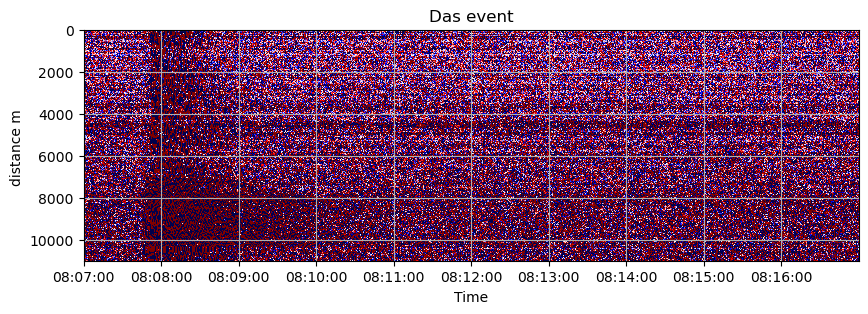

In [5]:

#fig,ax=plt.subplots(figsize=(10,6))
#ax=plt.subplot(1,1,1)
date_format = mdates.DateFormatter('%H:%M:%S')
x_lims = mdates.date2num(np.array(data['time']))
x_max = np.array(data['datachannel']).shape[1] * data.attrs['SpatialSamplingInterval']
fig,ax=plt.subplots(figsize=(10,3))
plt.imshow(10*np.array(data['datachannel']).T,cmap='seismic',aspect='auto',vmin=-0.02,vmax=0.02,extent=[x_lims[0],x_lims[-1],x_max,0])
plt.title('Das event')
plt.xlabel("Time")
plt.ylabel("distance m ")

ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()
plt.grid()

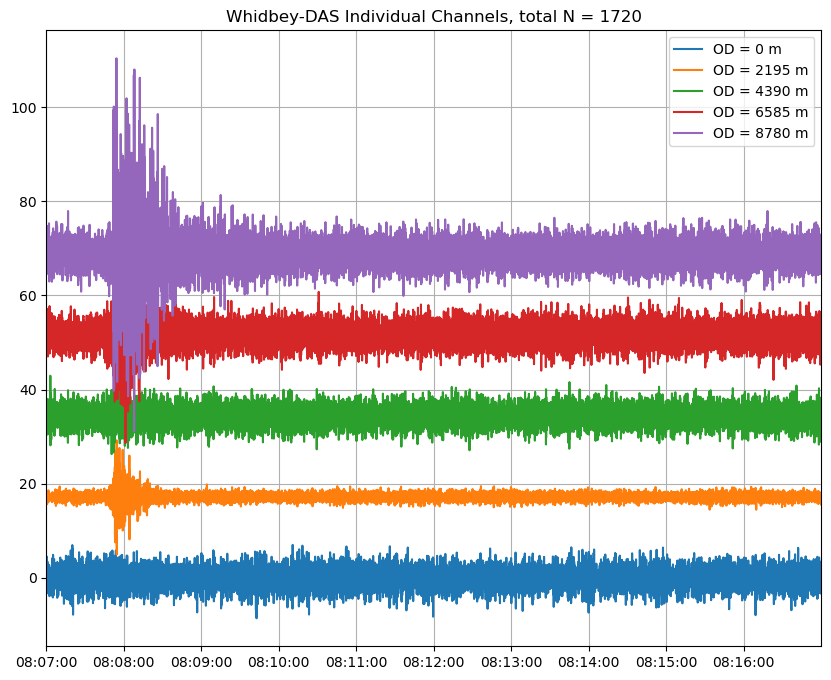

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
ax = plt.subplot(1,1,1)
fig.patch.set_facecolor('w')
    #graph_spacing = -400
    #graph_spacing = -2
dx = x_max / data['datachannel'].shape[1]
graph_spacing = -20
network_name = 'Whidbey-DAS'
for jj in range(0,data['datachannel'].shape[1],int(data['datachannel'].shape[1]/5)):
    #the value 10 in tge plot is just to see better the amplitudes.
    plt.plot(x_lims,10*data['datachannel'][:,jj]-jj/graph_spacing,label=f'OD = {int(jj*dx)} m')
    #plt.plot(np.array(data['time']),data['datachannel'][:,jj]-jj/graph_spacing,label=f'OD = {int(jj*dx)} m')
plt.legend(loc='upper right')
ax.set_title(f'{network_name} Individual Channels, total N = '+str(data['datachannel'].shape[1]))
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()
ax.autoscale(enable=True, axis='x', tight=True)
plt.grid()